In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, Input, Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import scipy

In [3]:
dataset_path = 'Deteksi Muka/DataSet/dataset'

train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'validation')
test_path = os.path.join(dataset_path, 'test')

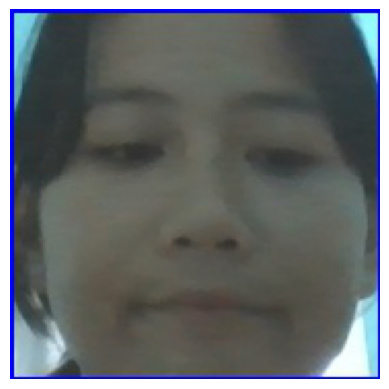

In [4]:
import random
from tensorflow.keras.preprocessing.image import load_img

person_dirs = os.listdir(test_path)
random_person_dir = random.choice(person_dirs)

random_person_path = os.path.join(test_path, random_person_dir)
random_image = random.choice(os.listdir(random_person_path))
random_image_path = os.path.join(random_person_path, random_image)

image = load_img(random_image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [6]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [7]:
num_classes =7
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x) 

In [8]:
model = Model(inputs=base_model.input, outputs=output)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Luis R\anaconda3\envs\mycaps\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Found 420 images belonging to 7 classes.


Found 210 images belonging to 7 classes.
Epoch 1/10
14/14 [==============================] - 13s 371ms/step - loss: 0.8217 - accuracy: 0.6976 - val_loss: 0.0490 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 5s 345ms/step - loss: 0.0789 - accuracy: 0.9810 - val_loss: 0.0621 - val_accuracy: 0.9857
Epoch 3/10
14/14 [==============================] - 4s 314ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 4s 314ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 4s 316ms/step - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.0277 - val_accuracy: 0.9857
Epoch 6/10
14/14 [==============================] - 4s 314ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 4s 317ms/step - loss: 0.0084 - accuracy: 0.9976 - val_

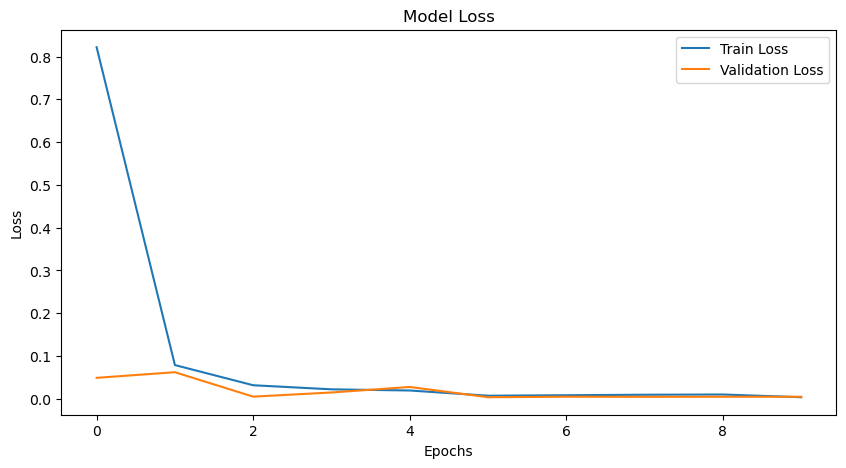

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

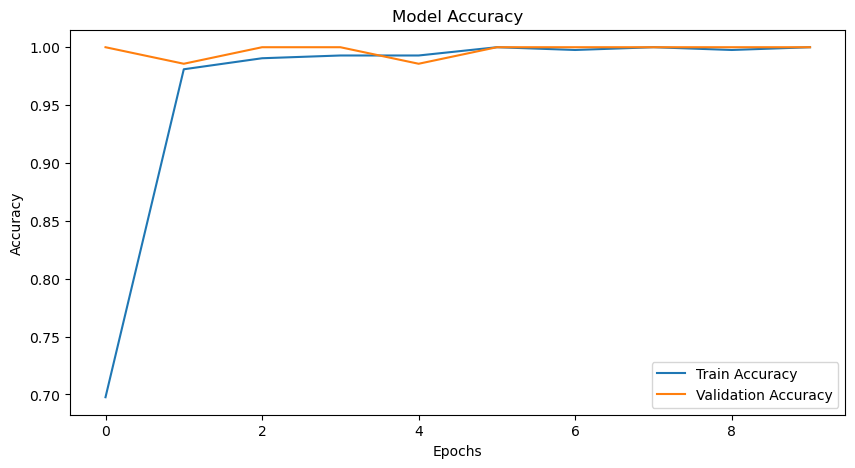

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

3/3 [==============================] - 0s 37ms/step - loss: 0.0010 - accuracy: 1.0000
Test Loss: 0.0010327252093702555
Test Accuracy: 1.0


In [13]:
model.save('model_pretrained.h5')